# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: G:\Projects\DataViz-Lesson-Plans\01-Lesson-Plans\07-Project-1\3\Activities\02-Ins_TTest\Solved\Ins_1samp_ttest</h1></font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

# Helper Functions to Generate and Plot Data

In [3]:
# Generate some fake data to test with
def gendata(loc=0):
    population = stats.norm.rvs(size=1000, random_state=42)
    sample = stats.norm.rvs(loc=loc, size=200, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

# One Sample T-Tests

One Sample t-tests allow you to compare your sample mean to the population mean.

### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is randomly sampled

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html

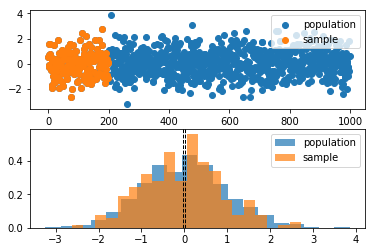

In [4]:
# Generate some data and show the scatter plot
population, sample = gendata()

In [5]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.912976906342992, pvalue=0.36235943886051503)

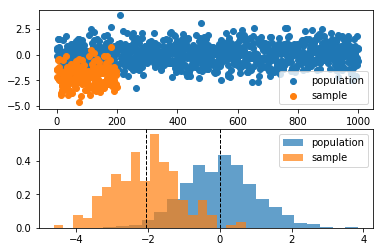

In [6]:
# Generate data with a bigger difference in means
population, sample = gendata(loc=-2)

In [7]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-31.293376800980507, pvalue=8.6800698449009275e-79)

<hr><font color="green"><h1>from file: G:\Projects\DataViz-Lesson-Plans\01-Lesson-Plans\07-Project-1\3\Activities\02-Ins_TTest\Solved\Ins_independent_ttest</h1></font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

# Helper Functions to Generate and Plot Data

In [3]:
# Generate some fake data to test with
def gendata(loc1=0, loc2=0):
    population1 = stats.norm.rvs(loc=loc1, size=50, random_state=0)
    population2 = stats.norm.rvs(loc=loc2, size=45, random_state=42)

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="population1")
    plt.scatter(range(len(population2)), population2, label="population2")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="population1")
    plt.hist(population2, 10, density=True, alpha=0.7, label="population2")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

# Independent T-Tests

Independent t-tests will compare the means of 2 independent populations.

### Assumptions

1. Data is normally distributed
2. Data is independent
3. Data is homogenous (The standard deviations are roughly equal)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

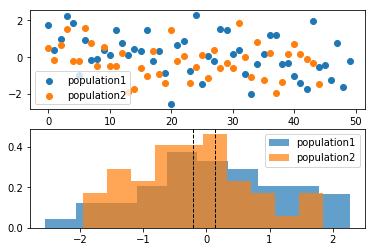

In [4]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [5]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=1.6803990578525561, pvalue=0.096264931237246845)

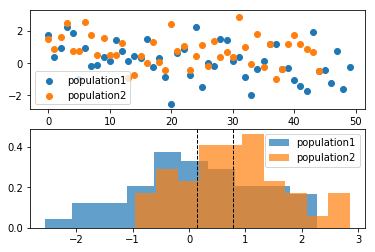

In [6]:
# Generate data with a bigger difference in means
population1, population2 = gendata(loc1=0, loc2=1)

In [7]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-3.029216121188858, pvalue=0.0031807310798192046)

<hr><font color="green"><h1>from file: G:\Projects\DataViz-Lesson-Plans\01-Lesson-Plans\10-Advanced-Data-Storage-and-Retrieval\3\Activities\02-Ins_Dates\Solved\Ins_Dates</h1></font>

# SQLAlchemy, Sqlite, and Dates

## Setup

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
engine = create_engine("sqlite:///../Resources/dow.sqlite", echo=False)

## Explore Database

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['dow']

In [4]:
# Get a list of column names and types
columns = inspector.get_columns('dow')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
quarter INTEGER
stock TEXT
date TEXT
open_price FLOAT
high_price FLOAT
low_price FLOAT
close_price FLOAT
volume INTEGER
percent_change FLOAT


In [5]:
engine.execute('SELECT * FROM dow LIMIT 5').fetchall()

[(1, 1, 'AA', '2011-01-07', 15.82, 16.72, 15.78, 16.42, 239655616, None),
 (2, 1, 'AA', '2011-01-14', 16.71, 16.71, 15.64, 15.97, 242963398, None),
 (3, 1, 'AA', '2011-01-21', 16.19, 16.38, 15.6, 15.79, 138428495, None),
 (4, 1, 'AA', '2011-01-28', 15.87, 16.63, 15.82, 16.13, 151379173, None),
 (5, 1, 'AA', '2011-02-04', 16.18, 17.39, 16.18, 17.14, 154387761, None)]

## Reflect and query dates

In [6]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Dow = Base.classes.dow

In [7]:
session = Session(engine)

How many dates do we have?

In [8]:
# Total dates
session.query(func.count(Dow.date)).all()

[(750)]

What is the earliest date?

In [9]:
# Earliest Date
session.query(Dow.date).order_by(Dow.date).first()

('2011-01-07')

What is the latest date?

In [10]:
# Latest Date
session.query(Dow.date).order_by(Dow.date.desc()).first()

('2011-06-24')

Find all of the dates great than `2011-03-01`

In [11]:
session.query(Dow.date).\
    filter(Dow.date > '2011-03-01').\
    order_by(Dow.date).all()

[('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-04'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'),
 ('2011-03-11'

### Important Note! Sqlite does not support a date column type, but SQLAlchemy will allow you to work with dates in the iso format. [sqlite dates](http://docs.sqlalchemy.org/en/latest/dialects/sqlite.html)

# Quick Review of DateTime

In [12]:
import datetime as dt

In [13]:
# Print a date object and a datetime object 
print(dt.date.today())
print(dt.date(2017, 1 ,31))

2018-04-25
2017-01-31


In [14]:
print(dt.datetime.utcnow())
print(dt.datetime(2017, 1, 31))

2018-04-26 03:32:47.698976
2017-01-31 00:00:00


Calculate a time delta

In [15]:
# date 1 week ago from today
week_ago = dt.date.today() - dt.timedelta(days=7)

Query for the Dow closing price 1 week before `2011-04-08` using the datetime library

In [16]:
# Query for the Dow closing price for `CSCO` 1 week before `2011-04-08` using the datetime library
query_date = dt.date(2011, 4, 8) - dt.timedelta(days=7)
print("Query Date: ", query_date)

Query Date:  2011-04-01


In [17]:
session.query(Dow.date, Dow.close_price).\
    filter(Dow.stock == 'CSCO').\
    filter(Dow.date == query_date).all()

[('2011-04-01', 17.04)]

In [18]:
# Parse out just the day from the datetime object
dt.date.today().strftime("%d")

'25'

Putting it all together

In [19]:
# Query for all dates matching the 
# following date string in the format `%d`
date_str = "14"
session.query(Dow.date).\
    filter(func.strftime("%d", Dow.date) == date_str).all()

[('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14'),
 ('2011-01-14')]

## Your Turn!

DataSet Citation: 

Brown, M. S., Pelosi, M. & Dirska, H. (2013). Dynamic-radius Species-conserving Genetic Algorithm for 
the Financial Forecasting of Dow Jones Index Stocks. Machine Learning and Data Mining in Pattern 
Recognition, 7988, 27-41.
